# Домашнее задание 3. Алгоритмы кластеризации

Основная задача этого задания -- реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [12]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
from sklearn.metrics.pairwise import pairwise_distances
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
import sklearn.neighbors as nb
from mpl_toolkits.mplot3d import axes3d
# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Cчитываем данные, полученные в результате выполнения предыдущего домашнего задания, в `data frame` библиотеки `pandas`. Конвертируем данные в массив `numpy`.

In [2]:
data_df = pd.read_csv("hw2_out.csv", sep="\t", header=0, index_col="uid")
x = data_df.values


Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего логина на портале Техносферы. При проверке домашнего задания бадут осуществляться проверка логина и соответствующего алгоритма.

In [13]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры  - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]
4
my_algorithm = algorithms[hash("Kawaii-lenko") % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры  - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [3]:
UNCLASSIFIED = 0
NOISE = -1
class Clustering:
    """
    Implement clustering algorithm according 
    """

    
  
    
    
    def neighbors(self, x, i, neighbors_of_pts):
        nbrs = []
        size = 0
  
        size = neighbors_of_pts[i].shape[0]
        return size, neighbors_of_pts[i].tolist()
    
    
    def expand_cluster (self,x, cluster_count, point_id, neighbors):
           #continue
        size, nbr = self.neighbors(x,point_id, neighbors)
        if size < self.min_pts :
            #index = np.nonzero(x == elem)
            self.labels[point_id] = NOISE
            return False
        
        self.labels[point_id] = cluster_count
        for elem in nbr:
            self.labels[elem] = cluster_count
        #self.labels.update({point_id:cluster_count})
     
        while len(nbr) > 0:
            curr_point = nbr[0]
            size, results = self.neighbors(x, curr_point, neighbors)
            if size >= self.min_pts:
                for i in range(0, len(results)):
                    result_point = results[i]
                    if self.labels[result_point] == UNCLASSIFIED:
                            nbr.append(result_point)
                    self.labels[result_point] = cluster_count
            nbr = nbr[1:]
        return True
    
    def __init__(self, **kwargs):
        if kwargs == {}:
            return
        
        self.epsilon = kwargs['epsilon']
        self.min_pts = kwargs['min_pts']

        """
        Please add necessary algoritm parameters to class constructor.
        
        """
        self.labels = np.zeros((1,0))
        
        return 
    
    
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.labels = np.zeros((x.shape[0],1), dtype = int)
        #print x.shape
        data_tree = nb.KDTree(x, leaf_size = 30,   #leaf is a default value
                                 metric='euclidean', **({}))   #default metric
        
        neighbors_of_pts = data_tree.query_radius(x, self.epsilon, return_distance=False) 
        #
        
        cluster_count = 1
        for point_id in range(x.shape[0]):
            
            if self.labels[point_id] == 0:
                if self.expand_cluster(x, cluster_count, point_id, neighbors_of_pts):
              
                    cluster_count += 1
      
        return 
    
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        self.labels = self.labels -1
        return ravel(self.labels)
    
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


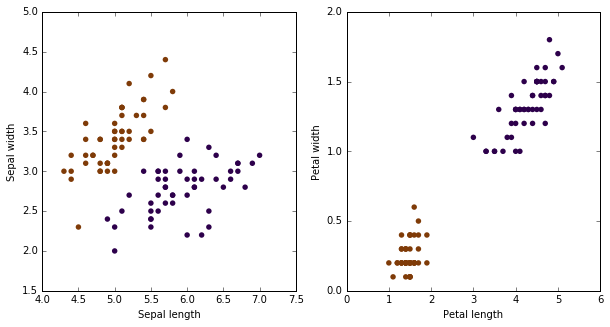

In [4]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]
print y_iris
pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [5]:

pred_iris = Clustering(epsilon = 0.9, min_pts = 5).fit_predict(x_iris)
print pred_iris.ravel()
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [6]:

distance = pairwise_distances(x)
print distance.shape


(11434, 11434)


In [7]:
min_value = np.min(x)
max_value = np.max(x)
min_max_diference = max_value - min_value
x = (x - min_value) / min_max_diference


In [8]:
def mean_distance_in_clasters(distance_arr, labels, i):
    mask = labels == labels[i]
    mask[i] = False
    return np.mean(distance_arr[mask])

def mean_distance_to_nearest_claster(distance_arr, labels, i):
    b = [np.mean(distance_arr[labels == cur_label]) 
                for cur_label in set(labels) if cur_label != labels[i]]
    return np.min(b)


def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    #average diameter
   # distance = compute_distance(x)
    
    if len(set(y)) == 1:
        return -1
   # A = mean_distance(distance, y)
    #B = mean_distance_to_nearest_claster(distance, y)
    labels = y
    A = np.array([mean_distance_in_clasters(distance[i], labels, i) for i in range(len(labels))])
    B = np.array([mean_distance_to_nearest_claster(distance[i], labels, i) for i in range(len(labels))])

    silhouette_score = np.nanmean(((B - A) / np.maximum(A, B)))
    return silhouette_score


Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [29]:
eps = [0.09, 0.11, 0.13]
pts = [20, 21, 22, 23, 24]
#eps = [1]
#pts = [2]
criteria = np.zeros(len(eps) * len(pts))
y_ax, x_ax =  [], []
cnt_plot= 0
for i, epsilon_ in enumerate(eps):
    for j, min_pts_ in enumerate(pts):
        
        cls = Clustering(epsilon = epsilon_, min_pts = min_pts_)
        y = cls.fit_predict(x)
        print y
        criteria[cnt_plot] = quality(x, y)
        x_ax.append(epsilon_)
        y_ax.append(min_pts_)
        print "quality", criteria[cnt_plot], " eps = ", epsilon_, " min_pts = ", min_pts_, " cnt_claster = ", len(set(y))
        #if criteria[cnt_plot] != -1:
            #print "skilearn: ", mt.silhouette_score(x, y)
        cnt_plot += 1


[0 0 1 ..., 2 2 2]
quality -0.0771344414961  eps =  0.09  min_pts =  20  cnt_claster =  7
[0 0 1 ..., 2 2 2]
quality -0.0803801868597  eps =  0.09  min_pts =  21  cnt_claster =  7
[0 0 1 ..., 2 2 2]
quality -0.0372924429051  eps =  0.09  min_pts =  22  cnt_claster =  6
[0 0 1 ..., 2 2 2]
quality -0.0369082365304  eps =  0.09  min_pts =  23  cnt_claster =  6
[0 0 1 ..., 2 2 2]
quality -0.0369884379955  eps =  0.09  min_pts =  24  cnt_claster =  6
[0 0 1 ..., 2 2 2]
quality -0.108958957848  eps =  0.11  min_pts =  20  cnt_claster =  9
[0 0 1 ..., 2 2 2]
quality -0.116657594501  eps =  0.11  min_pts =  21  cnt_claster =  9
[0 0 1 ..., 2 2 2]
quality -0.074785514959  eps =  0.11  min_pts =  22  cnt_claster =  7
[0 0 1 ..., 2 2 2]
quality -0.0748444969188  eps =  0.11  min_pts =  23  cnt_claster =  7
[0 0 1 ..., 2 2 2]
quality -0.0752031883437  eps =  0.11  min_pts =  24  cnt_claster =  7
[0 0 0 ..., 0 0 0]
quality 0.290457691012  eps =  0.13  min_pts =  20  cnt_claster =  3
[0 0 0 ..., 0 0

In [9]:
eps = [0.09, 0.1, 0.11]
pts = [  20, 21, 22, 24, 25,27,28, 29, 30]
#eps = [1]
#pts = [2]
criteria = np.zeros(len(eps) * len(pts))
y_ax, x_ax =  [], []
cnt_plot= 0
max = -1
eps_max = 0
pts_max = 0
new_x = np.zeros((100,x.shape[1]))
for i, epsilon_ in enumerate(eps):
    for j, min_pts_ in enumerate(pts):
     
       # for k in range(100):
           
       #     new_x[k,:] = x[np.random.choice(x.shape[0]), :]
        
        cls = Clustering(epsilon = epsilon_, min_pts = min_pts_)
        y = cls.fit_predict(x)
        print set(y)
       # print y
        #print np.where(y == 39)
        criteria[cnt_plot] = quality(x, y)
        if max<criteria[cnt_plot]:
            max = criteria[cnt_plot]
            eps_max = epsilon_
            pts_max = min_pts_
            
        x_ax.append(epsilon_)
        y_ax.append(min_pts_)
        print "quality", criteria[cnt_plot], " eps = ", epsilon_, " min_pts = ", min_pts_, " cnt_claster = ", len(set(y))
        #if criteria[cnt_plot] != -1:
            #print "skilearn: ", mt.silhouette_score(x, y)
        cnt_plot += 1
print "MAX: ", max, "epsilon: ", eps_max, "min_pts: ", pts_max

set([0, 1, 2, 3, 4, 5, -2])
quality -0.0771344414961  eps =  0.09  min_pts =  20  cnt_claster =  7
set([0, 1, 2, 3, 4, 5, -2])
quality -0.0803801868597  eps =  0.09  min_pts =  21  cnt_claster =  7
set([0, 1, 2, 3, 4, -2])
quality -0.0372924429051  eps =  0.09  min_pts =  22  cnt_claster =  6
set([0, 1, 2, 3, 4, -2])
quality -0.0369884379955  eps =  0.09  min_pts =  24  cnt_claster =  6
set([0, 1, 2, 3, 4, -2])
quality -0.0380783468676  eps =  0.09  min_pts =  25  cnt_claster =  6
set([0, 1, 2, 3, 4, -2])
quality -0.0383297423529  eps =  0.09  min_pts =  27  cnt_claster =  6
set([0, 1, 2, 3, -2])
quality 0.0335894196721  eps =  0.09  min_pts =  28  cnt_claster =  5
set([0, 1, 2, 3, -2])
quality 0.0333967729087  eps =  0.09  min_pts =  29  cnt_claster =  5
set([0, 1, 2, 3, -2])
quality 0.0322244698609  eps =  0.09  min_pts =  30  cnt_claster =  5
set([0, 1, 2, 3, 4, 5, -2])
quality -0.0721976305555  eps =  0.1  min_pts =  20  cnt_claster =  7
set([0, 1, 2, 3, 4, 5, -2])
quality -0.07420

Далее необходимо кластеризовать данные, используя выбранное количество кластеров, и визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время. 

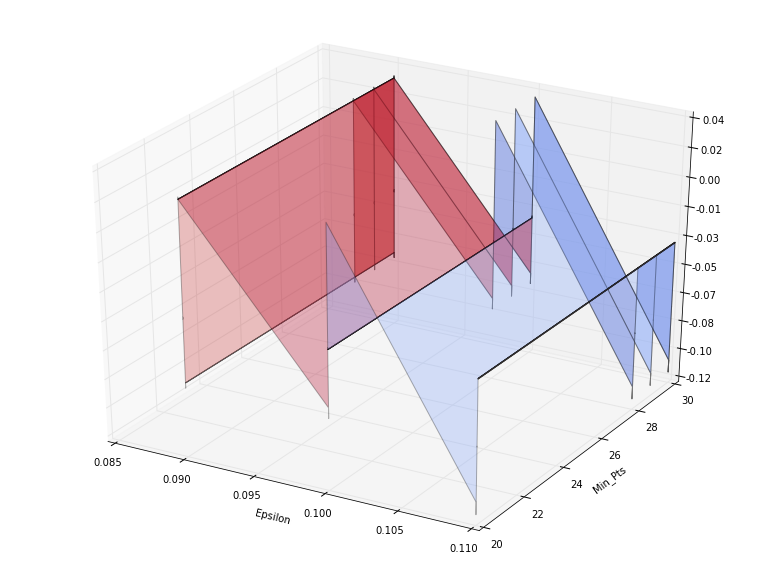

In [15]:

X, Y = np.meshgrid(x_ax, y_ax)
Z = criteria.reshape(-1, len(x_ax))

fig = pl.figure(figsize=(30, 10))

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3,cmap=cm.coolwarm )
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#fig.colorbar(surf, shrink=0.5, aspect=5)
pl.ylabel("Min_Pts ")
pl.xlabel("Epsilon")
pl.grid()
pl.show()


In [25]:

cls = Clustering(epsilon = 0.1, min_pts =30)
y = cls.fit_predict(x)
k = len(set(y))
y = y +1
for i in range(len(y)):
    if y[i]  == -1:
        y[i] = 0
print k
print set(y)


5
set([0, 1, 2, 3, 4])


Визуализируем результаты кластеризации ([подсказка](http://anokhin.github.io/img/hw3_tsne-kmeans.png)). Можно ли сказать, что в двумерном пространстве объекты из одного кластера находятся недалеко? Какой вывод можно сделать о качестве кластеризации?

In [18]:
tsne = sm.TSNE(n_components=2, verbose=1, n_iter=1000)
z = tsne.fit_transform(x)


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 11434
[t-SNE] Computed conditional probabilities for sample 2000 / 11434
[t-SNE] Computed conditional probabilities for sample 3000 / 11434
[t-SNE] Computed conditional probabilities for sample 4000 / 11434
[t-SNE] Computed conditional probabilities for sample 5000 / 11434
[t-SNE] Computed conditional probabilities for sample 6000 / 11434
[t-SNE] Computed conditional probabilities for sample 7000 / 11434
[t-SNE] Computed conditional probabilities for sample 8000 / 11434
[t-SNE] Computed conditional probabilities for sample 9000 / 11434
[t-SNE] Computed conditional probabilities for sample 10000 / 11434
[t-SNE] Computed conditional probabilities for sample 11000 / 11434
[t-SNE] Computed conditional probabilities for sample 11434 / 11434
[t-SNE] Mean sigma: 0.007215
[t-SNE] Error after 100 iterations with early exaggeration: 1.341707
[t-SNE] Error

set([0, 1, 2, 3, 4])


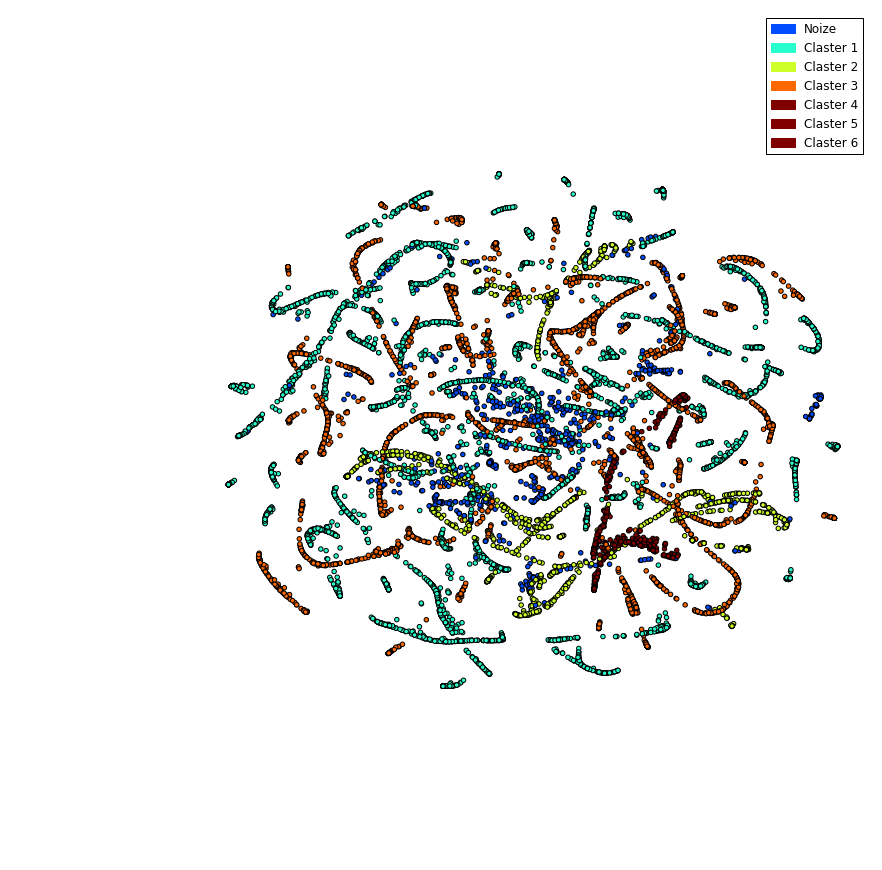

In [26]:
print set(y)
k = len(set(y))
import matplotlib.patches as mpatches
# Color map
cm = pl.get_cmap('jet')
pl.figure(figsize=(15, 15))
pl.scatter(z[:, 0], z[:, 1], c=map(lambda c: cm(((1.0* c + 1)) /k), y))
patch_1 = mpatches.Patch(color=cm(((1.0* 0 + 1)) /k), label="Noize")
patch_2 = mpatches.Patch(color=cm(((1.0* 1 + 1)) /k), label="Claster 1")
patch_3 = mpatches.Patch(color=cm(((1.0* 2 + 1))/k), label="Claster 2")
patch_4 = mpatches.Patch(color=cm(((1.0* 3 + 1))/k), label="Claster 3")
patch_5 = mpatches.Patch(color=cm(((1.0* 4 + 1)) /k), label="Claster 4")
patch_6 = mpatches.Patch(color=cm(((1.0* 5 + 1)) /k), label="Claster 5")
patch_7 = mpatches.Patch(color=cm(((1.0* 6 + 1)) /k), label="Claster 6")
plt.legend(handles=[patch_1, patch_2, patch_3, patch_4 ,patch_5, patch_6, patch_7])
pl.axis('off')
pl.show()

Попробуем проанализировать полученные кластеры. Для того, чтобы интерпретировать "суть" каждого из кластеров, построим [radar plot](http://www.wikiwand.com/en/Radar_chart), отображающий их центроиды. Посмотрите на графики и попробуйте объяснить, каким поведением можно охарактеризовать каждый из полученных кластеров? Есть ли среди кластеров похожие?

Реализация радара позаимствована отсюда: 
http://www.science-emergence.com/Matplotlib/MatplotlibGallery/RadarChartMatplotlibRougier/

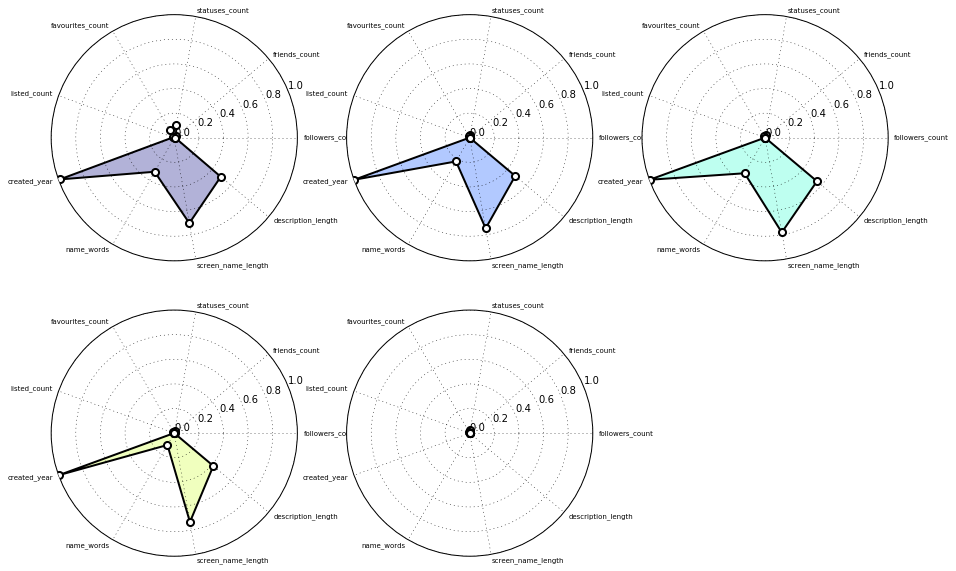

In [27]:
def radar(centroid, features, axes, color):
    # Set ticks to the number of features (in radians)
    t = np.arange(0, 2*np.pi, 2*np.pi/len(features))
    plt.xticks(t, [])

    # Set yticks from 0 to 1
    plt.yticks(np.linspace(0, 1, 6))

    # Draw polygon representing centroid
    points = [(x, y) for x, y in zip(t, centroid)]
    points.append(points[0])
    points = np.array(points)
    codes = [path.Path.MOVETO,] + [path.Path.LINETO,] * (len(centroid) - 1) + [ path.Path.CLOSEPOLY ]
    _path = path.Path(points, codes)
    _patch = patches.PathPatch(_path, fill=True, color=color, linewidth=0, alpha=.3)
    axes.add_patch(_patch)
    _patch = patches.PathPatch(_path, fill=False, linewidth = 2)
    axes.add_patch(_patch)

    # Draw circles at value points
    plt.scatter(points[:,0], points[:,1], linewidth=2, s=50, color='white', edgecolor='black', zorder=10)

    # Set axes limits
    plt.ylim(0, 1)

    # Draw ytick labels to make sure they fit properly
    for i in range(len(features)):
        angle_rad = i/float(len(features))*2*np.pi
        angle_deg = i/float(len(features))*360
        ha = "right"
        if angle_rad < np.pi/2 or angle_rad > 3*np.pi/2: ha = "left"
        plt.text(angle_rad, 1.05, features[i], size=7, horizontalalignment=ha, verticalalignment="center")

# Some additiola imports
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Choose some nice colors
matplotlib.rc('axes', facecolor = 'white')
# Make figure background the same colors as axes 
fig = plt.figure(figsize=(15, 15), facecolor='white')

cm = pl.get_cmap('jet')

clusters = np.unique(y)
for j, cluster in enumerate(clusters):    
    x_c = x[y == cluster]
    centroid = x_c.mean(axis=0)    
    # Use a polar axes
    axes = plt.subplot(3, 3, j + 1, polar=True)
    radar(centroid, data_df.columns.values, axes, cm(1.0 * j / k))

plt.show()

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.